In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import missingno as msno

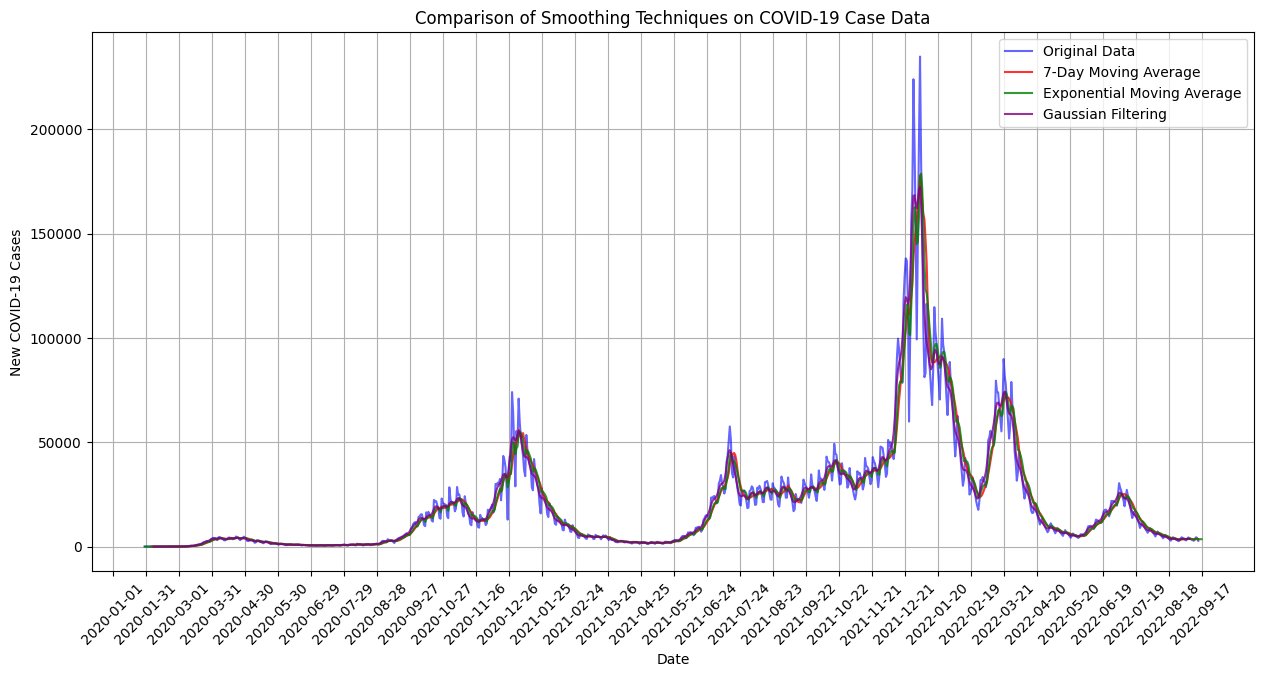

In [2]:

data = pd.read_csv("../data/google_data.csv")
# Selecting the 'New COVID-19 Cases' column for analysis
cases = data['new_confirmed']

# Applying the 7-day moving average
moving_average_7d = cases.rolling(window=7).mean()

# Applying Exponential Moving Average (EMA)
exponential_ma = cases.ewm(span=7, adjust=False).mean()

# Applying Gaussian Filtering
gaussian_filtered = gaussian_filter(cases, sigma=2)

# Plotting the original data and the smoothed data
plt.figure(figsize=(15, 7))
plt.plot(data['date'], cases, label='Original Data', color='blue', alpha=0.6)
plt.plot(data['date'], moving_average_7d, label='7-Day Moving Average', color='red', alpha=0.8)
plt.plot(data['date'], exponential_ma, label='Exponential Moving Average', color='green', alpha=0.8)
plt.plot(data['date'], gaussian_filtered, label='Gaussian Filtering', color='purple', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('New COVID-19 Cases')
plt.title('Comparison of Smoothing Techniques on COVID-19 Case Data')
plt.xticks(np.arange(0, len(data), step=30), rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [3]:
data.columns

Index(['Unnamed: 0', 'location_key', 'date', 'place_id', 'wikidata_id',
       'country_code', 'country_name', 'subregion1_code', 'subregion1_name',
       'iso_3166_1_alpha_2', 'iso_3166_1_alpha_3', 'aggregation_level',
       'new_confirmed', 'new_deceased', 'new_tested', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_tested', 'new_hospitalized_patients',
       'cumulative_hospitalized_patients', 'current_hospitalized_patients',
       'current_ventilator_patients', 'new_persons_vaccinated',
       'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated',
       'cumulative_persons_fully_vaccinated', 'new_vaccine_doses_administered',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'popula

In [4]:
data.head()

,Unnamed: 0,location_key,date,place_id,wikidata_id,country_code,country_name,subregion1_code,subregion1_name,iso_3166_1_alpha_2,...,facial_coverings,vaccination_policy,stringency_index,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,0,GB_ENG,2020-01-01,ChIJ39UebIqp0EcRqI4tMyWV4fQ,Q21,GB,United Kingdom,ENG,England,GB,...,0.0,0.0,0.0,4.916667,1.847222,6.138889,0.108857,NaN,3.840278,92.753315
1,1,GB_ENG,2020-01-02,ChIJ39UebIqp0EcRqI4tMyWV4fQ,Q21,GB,United Kingdom,ENG,England,GB,...,0.0,0.0,0.0,8.250000,5.673611,10.000000,0.000000,NaN,6.131944,86.523195
2,2,GB_ENG,2020-01-03,ChIJ39UebIqp0EcRqI4tMyWV4fQ,Q21,GB,United Kingdom,ENG,England,GB,...,0.0,0.0,0.0,7.229167,4.381944,10.111111,0.465667,NaN,4.506944,82.876060
3,3,GB_ENG,2020-01-04,ChIJ39UebIqp0EcRqI4tMyWV4fQ,Q21,GB,United Kingdom,ENG,England,GB,...,0.0,0.0,0.0,6.861111,4.187500,8.569444,0.217714,NaN,4.034722,82.214306
4,4,GB_ENG,2020-01-05,ChIJ39UebIqp0EcRqI4tMyWV4fQ,Q21,GB,United Kingdom,ENG,England,GB,...,0.0,0.0,0.0,7.291667,4.625000,9.118056,0.000000,NaN,5.305556,87.216596


In [5]:
# Dropping irrelevant columns (like unique identifiers)
columns_to_drop = ['Unnamed: 0', 'location_key', 'place_id', 'wikidata_id', 
                   'country_code', 'country_name', 'subregion1_code', 
                   'subregion1_name', 'iso_3166_1_alpha_2', 'iso_3166_1_alpha_3', 'population',
       'population_male', 'population_female', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'population_age_80_and_older','income_support', 'debt_relief',
       'fiscal_measures', 'international_support',
       'public_information_campaigns', 'testing_policy', 'contact_tracing', 'new_persons_vaccinated',
       'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated',
       'cumulative_persons_fully_vaccinated', 'new_vaccine_doses_administered',
       'cumulative_vaccine_doses_administered']

cleaned_data = data.drop(columns=columns_to_drop)
cleaned_data.head()

,date,aggregation_level,new_confirmed,new_deceased,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_tested,new_hospitalized_patients,cumulative_hospitalized_patients,...,facial_coverings,vaccination_policy,stringency_index,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,2020-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,4.916667,1.847222,6.138889,0.108857,NaN,3.840278,92.753315
1,2020-01-02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,8.250000,5.673611,10.000000,0.000000,NaN,6.131944,86.523195
2,2020-01-03,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,7.229167,4.381944,10.111111,0.465667,NaN,4.506944,82.876060
3,2020-01-04,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,6.861111,4.187500,8.569444,0.217714,NaN,4.034722,82.214306
4,2020-01-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,7.291667,4.625000,9.118056,0.000000,NaN,5.305556,87.216596


In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                991 non-null    object 
 1   aggregation_level                   991 non-null    int64  
 2   new_confirmed                       959 non-null    float64
 3   new_deceased                        925 non-null    float64
 4   new_tested                          793 non-null    float64
 5   cumulative_confirmed                959 non-null    float64
 6   cumulative_deceased                 959 non-null    float64
 7   cumulative_tested                   959 non-null    float64
 8   new_hospitalized_patients           908 non-null    float64
 9   cumulative_hospitalized_patients    908 non-null    float64
 10  current_hospitalized_patients       909 non-null    float64
 11  current_ventilator_patients         896 non-n

In [7]:
selected = ['openstreetmap_id', 'latitude', 'longitude', 'area_sq_km',
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'international_travel_controls',]

area_data = cleaned_data[selected]

In [8]:
area_data.head(20)

,openstreetmap_id,latitude,longitude,area_sq_km,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls
0,58447,53.0,-1.0,130278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58447,53.0,-1.0,130278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58447,53.0,-1.0,130278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58447,53.0,-1.0,130278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58447,53.0,-1.0,130278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,58447,53.0,-1.0,130278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,58447,53.0,-1.0,130278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,58447,53.0,-1.0,130278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,58447,53.0,-1.0,130278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,58447,53.0,-1.0,130278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
area_data.tail()

,openstreetmap_id,latitude,longitude,area_sq_km,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls
986,58447,53.0,-1.0,130278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,58447,53.0,-1.0,130278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,58447,53.0,-1.0,130278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,58447,53.0,-1.0,130278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,58447,53.0,-1.0,130278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
columns_to_drop = ['openstreetmap_id', 'latitude', 'longitude', 'area_sq_km',
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'international_travel_controls', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'snowfall_mm',
       'dew_point', 'relative_humidity']

cleaned_data = cleaned_data.drop(columns=columns_to_drop)
cleaned_data.head()

,date,aggregation_level,new_confirmed,new_deceased,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_tested,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,current_ventilator_patients,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,average_temperature_celsius
0,2020-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,4.916667
1,2020-01-02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,8.250000
2,2020-01-03,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,7.229167
3,2020-01-04,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,6.861111
4,2020-01-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,7.291667


<Axes: >

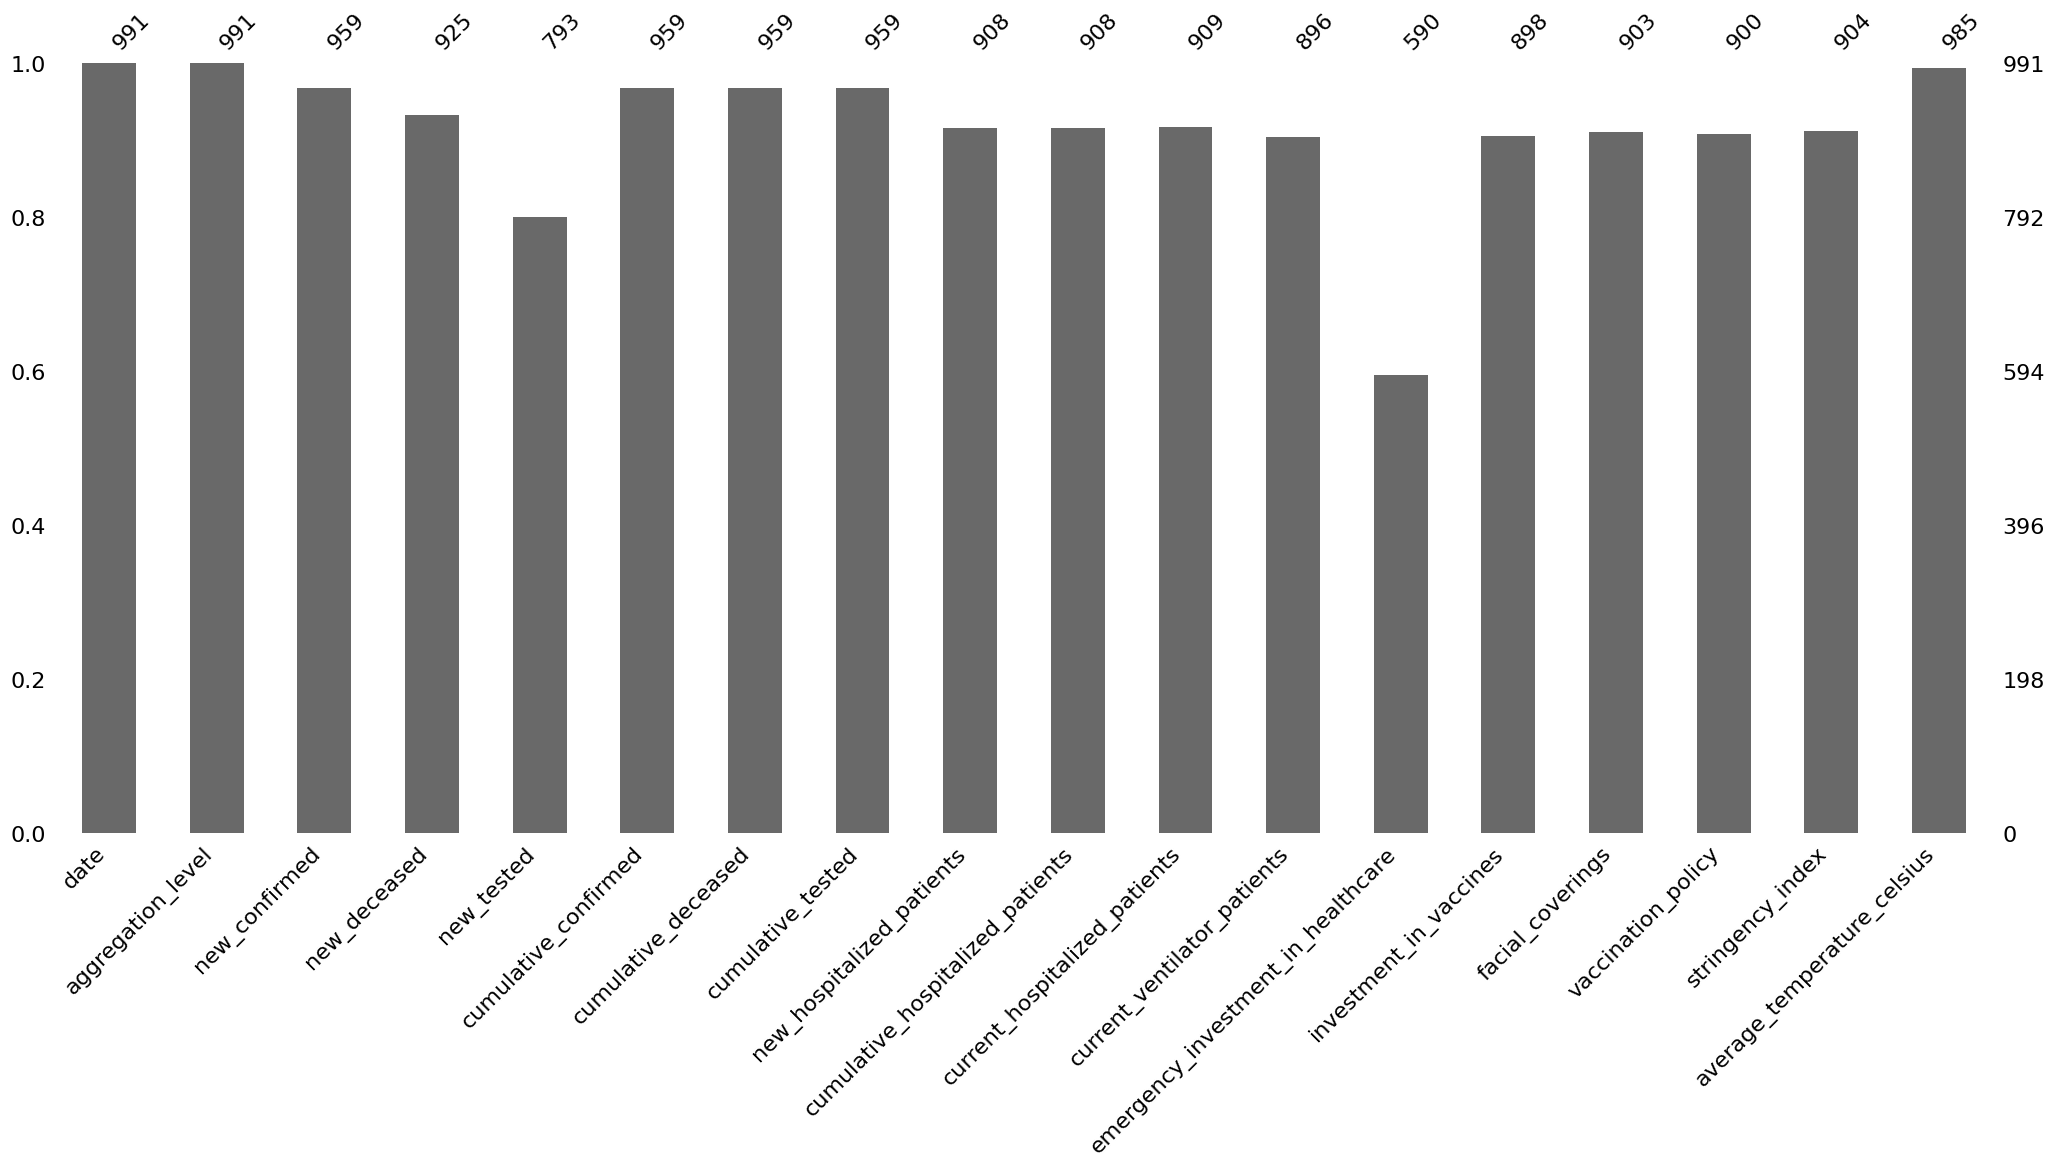

In [11]:
msno.bar(cleaned_data)

In [14]:
cleaned_data = cleaned_data.dropna(axis=0)

In [15]:
cleaned_data['day_of_week'] = cleaned_data['date'].dt.dayofweek
cleaned_data['month'] = cleaned_data['date'].dt.month
cleaned_data['week_of_year'] = cleaned_data['date'].dt.isocalendar().week

# Displaying the transformed dataset
cleaned_data.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [11]:

# Handling missing values - for simplicity, filling with the mean. 
# This strategy can be adjusted based on the specific nature of each variable.
cleaned_data = cleaned_data.fillna(cleaned_data.mean())

# Feature Engineering
# Extracting time-related features from the date column
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])
cleaned_data['day_of_week'] = cleaned_data['date'].dt.dayofweek
cleaned_data['month'] = cleaned_data['date'].dt.month
cleaned_data['week_of_year'] = cleaned_data['date'].dt.isocalendar().week

# Displaying the transformed dataset
cleaned_data.head()


TypeError: Could not convert ['2020-01-012020-01-022020-01-032020-01-042020-01-052020-01-062020-01-072020-01-082020-01-092020-01-102020-01-112020-01-122020-01-132020-01-142020-01-152020-01-162020-01-172020-01-182020-01-192020-01-202020-01-212020-01-222020-01-232020-01-242020-01-252020-01-262020-01-272020-01-282020-01-292020-01-302020-01-312020-02-012020-02-022020-02-032020-02-042020-02-052020-02-062020-02-072020-02-082020-02-092020-02-102020-02-112020-02-122020-02-132020-02-142020-02-152020-02-162020-02-172020-02-182020-02-192020-02-202020-02-212020-02-222020-02-232020-02-242020-02-252020-02-262020-02-272020-02-282020-02-292020-03-012020-03-022020-03-032020-03-042020-03-052020-03-062020-03-072020-03-082020-03-092020-03-102020-03-112020-03-122020-03-132020-03-142020-03-152020-03-162020-03-172020-03-182020-03-192020-03-202020-03-212020-03-222020-03-232020-03-242020-03-252020-03-262020-03-272020-03-282020-03-292020-03-302020-03-312020-04-012020-04-022020-04-032020-04-042020-04-052020-04-062020-04-072020-04-082020-04-092020-04-102020-04-112020-04-122020-04-132020-04-142020-04-152020-04-162020-04-172020-04-182020-04-192020-04-202020-04-212020-04-222020-04-232020-04-242020-04-252020-04-262020-04-272020-04-282020-04-292020-04-302020-05-012020-05-022020-05-032020-05-042020-05-052020-05-062020-05-072020-05-082020-05-092020-05-102020-05-112020-05-122020-05-132020-05-142020-05-152020-05-162020-05-172020-05-182020-05-192020-05-202020-05-212020-05-222020-05-232020-05-242020-05-252020-05-262020-05-272020-05-282020-05-292020-05-302020-05-312020-06-012020-06-022020-06-032020-06-042020-06-052020-06-062020-06-072020-06-082020-06-092020-06-102020-06-112020-06-122020-06-132020-06-142020-06-152020-06-162020-06-172020-06-182020-06-192020-06-202020-06-212020-06-222020-06-232020-06-242020-06-252020-06-262020-06-272020-06-282020-06-292020-06-302020-07-012020-07-022020-07-032020-07-042020-07-052020-07-062020-07-072020-07-082020-07-092020-07-102020-07-112020-07-122020-07-132020-07-142020-07-152020-07-162020-07-172020-07-182020-07-192020-07-202020-07-212020-07-222020-07-232020-07-242020-07-252020-07-262020-07-272020-07-282020-07-292020-07-302020-07-312020-08-012020-08-022020-08-032020-08-042020-08-052020-08-062020-08-072020-08-082020-08-092020-08-102020-08-112020-08-122020-08-132020-08-142020-08-152020-08-162020-08-172020-08-182020-08-192020-08-202020-08-212020-08-222020-08-232020-08-242020-08-252020-08-262020-08-272020-08-282020-08-292020-08-302020-08-312020-09-012020-09-022020-09-032020-09-042020-09-052020-09-062020-09-072020-09-082020-09-092020-09-102020-09-112020-09-122020-09-132020-09-142020-09-152020-09-162020-09-172020-09-182020-09-192020-09-202020-09-212020-09-222020-09-232020-09-242020-09-252020-09-262020-09-272020-09-282020-09-292020-09-302020-10-012020-10-022020-10-032020-10-042020-10-052020-10-062020-10-072020-10-082020-10-092020-10-102020-10-112020-10-122020-10-132020-10-142020-10-152020-10-162020-10-172020-10-182020-10-192020-10-202020-10-212020-10-222020-10-232020-10-242020-10-252020-10-262020-10-272020-10-282020-10-292020-10-302020-10-312020-11-012020-11-022020-11-032020-11-042020-11-052020-11-062020-11-072020-11-082020-11-092020-11-102020-11-112020-11-122020-11-132020-11-142020-11-152020-11-162020-11-172020-11-182020-11-192020-11-202020-11-212020-11-222020-11-232020-11-242020-11-252020-11-262020-11-272020-11-282020-11-292020-11-302020-12-012020-12-022020-12-032020-12-042020-12-052020-12-062020-12-072020-12-082020-12-092020-12-102020-12-112020-12-122020-12-132020-12-142020-12-152020-12-162020-12-172020-12-182020-12-192020-12-202020-12-212020-12-222020-12-232020-12-242020-12-252020-12-262020-12-272020-12-282020-12-292020-12-302020-12-312021-01-012021-01-022021-01-032021-01-042021-01-052021-01-062021-01-072021-01-082021-01-092021-01-102021-01-112021-01-122021-01-132021-01-142021-01-152021-01-162021-01-172021-01-182021-01-192021-01-202021-01-212021-01-222021-01-232021-01-242021-01-252021-01-262021-01-272021-01-282021-01-292021-01-302021-01-312021-02-012021-02-022021-02-032021-02-042021-02-052021-02-062021-02-072021-02-082021-02-092021-02-102021-02-112021-02-122021-02-132021-02-142021-02-152021-02-162021-02-172021-02-182021-02-192021-02-202021-02-212021-02-222021-02-232021-02-242021-02-252021-02-262021-02-272021-02-282021-03-012021-03-022021-03-032021-03-042021-03-052021-03-062021-03-072021-03-082021-03-092021-03-102021-03-112021-03-122021-03-132021-03-142021-03-152021-03-162021-03-172021-03-182021-03-192021-03-202021-03-212021-03-222021-03-232021-03-242021-03-252021-03-262021-03-272021-03-282021-03-292021-03-302021-03-312021-04-012021-04-022021-04-032021-04-042021-04-052021-04-062021-04-072021-04-082021-04-092021-04-102021-04-112021-04-122021-04-132021-04-142021-04-152021-04-162021-04-172021-04-182021-04-192021-04-202021-04-212021-04-222021-04-232021-04-242021-04-252021-04-262021-04-272021-04-282021-04-292021-04-302021-05-012021-05-022021-05-032021-05-042021-05-052021-05-062021-05-072021-05-082021-05-092021-05-102021-05-112021-05-122021-05-132021-05-142021-05-152021-05-162021-05-172021-05-182021-05-192021-05-202021-05-212021-05-222021-05-232021-05-242021-05-252021-05-262021-05-272021-05-282021-05-292021-05-302021-05-312021-06-012021-06-022021-06-032021-06-042021-06-052021-06-062021-06-072021-06-082021-06-092021-06-102021-06-112021-06-122021-06-132021-06-142021-06-152021-06-162021-06-172021-06-182021-06-192021-06-202021-06-212021-06-222021-06-232021-06-242021-06-252021-06-262021-06-272021-06-282021-06-292021-06-302021-07-012021-07-022021-07-032021-07-042021-07-052021-07-062021-07-072021-07-082021-07-092021-07-102021-07-112021-07-122021-07-132021-07-142021-07-152021-07-162021-07-172021-07-182021-07-192021-07-202021-07-212021-07-222021-07-232021-07-242021-07-252021-07-262021-07-272021-07-282021-07-292021-07-302021-07-312021-08-012021-08-022021-08-032021-08-042021-08-052021-08-062021-08-072021-08-082021-08-092021-08-102021-08-112021-08-122021-08-132021-08-142021-08-152021-08-162021-08-172021-08-182021-08-192021-08-202021-08-212021-08-222021-08-232021-08-242021-08-252021-08-262021-08-272021-08-282021-08-292021-08-302021-08-312021-09-012021-09-022021-09-032021-09-042021-09-052021-09-062021-09-072021-09-082021-09-092021-09-102021-09-112021-09-122021-09-132021-09-142021-09-152021-09-162021-09-172021-09-182021-09-192021-09-202021-09-212021-09-222021-09-232021-09-242021-09-252021-09-262021-09-272021-09-282021-09-292021-09-302021-10-012021-10-022021-10-032021-10-042021-10-052021-10-062021-10-072021-10-082021-10-092021-10-102021-10-112021-10-122021-10-132021-10-142021-10-152021-10-162021-10-172021-10-182021-10-192021-10-202021-10-212021-10-222021-10-232021-10-242021-10-252021-10-262021-10-272021-10-282021-10-292021-10-302021-10-312021-11-012021-11-022021-11-032021-11-042021-11-052021-11-062021-11-072021-11-082021-11-092021-11-102021-11-112021-11-122021-11-132021-11-142021-11-152021-11-162021-11-172021-11-182021-11-192021-11-202021-11-212021-11-222021-11-232021-11-242021-11-252021-11-262021-11-272021-11-282021-11-292021-11-302021-12-012021-12-022021-12-032021-12-042021-12-052021-12-062021-12-072021-12-082021-12-092021-12-102021-12-112021-12-122021-12-132021-12-142021-12-152021-12-162021-12-172021-12-182021-12-192021-12-202021-12-212021-12-222021-12-232021-12-242021-12-252021-12-262021-12-272021-12-282021-12-292021-12-302021-12-312022-01-012022-01-022022-01-032022-01-042022-01-052022-01-062022-01-072022-01-082022-01-092022-01-102022-01-112022-01-122022-01-132022-01-142022-01-152022-01-162022-01-172022-01-182022-01-192022-01-202022-01-212022-01-222022-01-232022-01-242022-01-252022-01-262022-01-272022-01-282022-01-292022-01-302022-01-312022-02-012022-02-022022-02-032022-02-042022-02-052022-02-062022-02-072022-02-082022-02-092022-02-102022-02-112022-02-122022-02-132022-02-142022-02-152022-02-162022-02-172022-02-182022-02-192022-02-202022-02-212022-02-222022-02-232022-02-242022-02-252022-02-262022-02-272022-02-282022-03-012022-03-022022-03-032022-03-042022-03-052022-03-062022-03-072022-03-082022-03-092022-03-102022-03-112022-03-122022-03-132022-03-142022-03-152022-03-162022-03-172022-03-182022-03-192022-03-202022-03-212022-03-222022-03-232022-03-242022-03-252022-03-262022-03-272022-03-282022-03-292022-03-302022-03-312022-04-012022-04-022022-04-032022-04-042022-04-052022-04-062022-04-072022-04-082022-04-092022-04-102022-04-112022-04-122022-04-132022-04-142022-04-152022-04-162022-04-172022-04-182022-04-192022-04-202022-04-212022-04-222022-04-232022-04-242022-04-252022-04-262022-04-272022-04-282022-04-292022-04-302022-05-012022-05-022022-05-032022-05-042022-05-052022-05-062022-05-072022-05-082022-05-092022-05-102022-05-112022-05-122022-05-132022-05-142022-05-152022-05-162022-05-172022-05-182022-05-192022-05-202022-05-212022-05-222022-05-232022-05-242022-05-252022-05-262022-05-272022-05-282022-05-292022-05-302022-05-312022-06-012022-06-022022-06-032022-06-042022-06-052022-06-062022-06-072022-06-082022-06-092022-06-102022-06-112022-06-122022-06-132022-06-142022-06-152022-06-162022-06-172022-06-182022-06-192022-06-202022-06-212022-06-222022-06-232022-06-242022-06-252022-06-262022-06-272022-06-282022-06-292022-06-302022-07-012022-07-022022-07-032022-07-042022-07-052022-07-062022-07-072022-07-082022-07-092022-07-102022-07-112022-07-122022-07-132022-07-142022-07-152022-07-162022-07-172022-07-182022-07-192022-07-202022-07-212022-07-222022-07-232022-07-242022-07-252022-07-262022-07-272022-07-282022-07-292022-07-302022-07-312022-08-012022-08-022022-08-032022-08-042022-08-052022-08-062022-08-072022-08-082022-08-092022-08-102022-08-112022-08-122022-08-132022-08-142022-08-152022-08-162022-08-172022-08-182022-08-192022-08-202022-08-212022-08-222022-08-232022-08-242022-08-252022-08-262022-08-272022-08-282022-08-292022-08-302022-08-312022-09-012022-09-022022-09-032022-09-042022-09-052022-09-062022-09-072022-09-082022-09-092022-09-102022-09-112022-09-122022-09-132022-09-142022-09-152022-09-162022-09-17'] to numeric

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Selecting relevant features for clustering
features_for_clustering = ['new_confirmed', 'new_deceased', 'new_hospitalized_patients', 
                           'vaccination_policy', 'stringency_index', 'average_temperature_celsius', 
                           'rainfall_mm']

clustering_data = cleaned_data[features_for_clustering]

# Normalizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
